#### Churn Modelling Kaggle Dataset URL: https://www.kaggle.com/datasets/shubh0799/churn-modelling

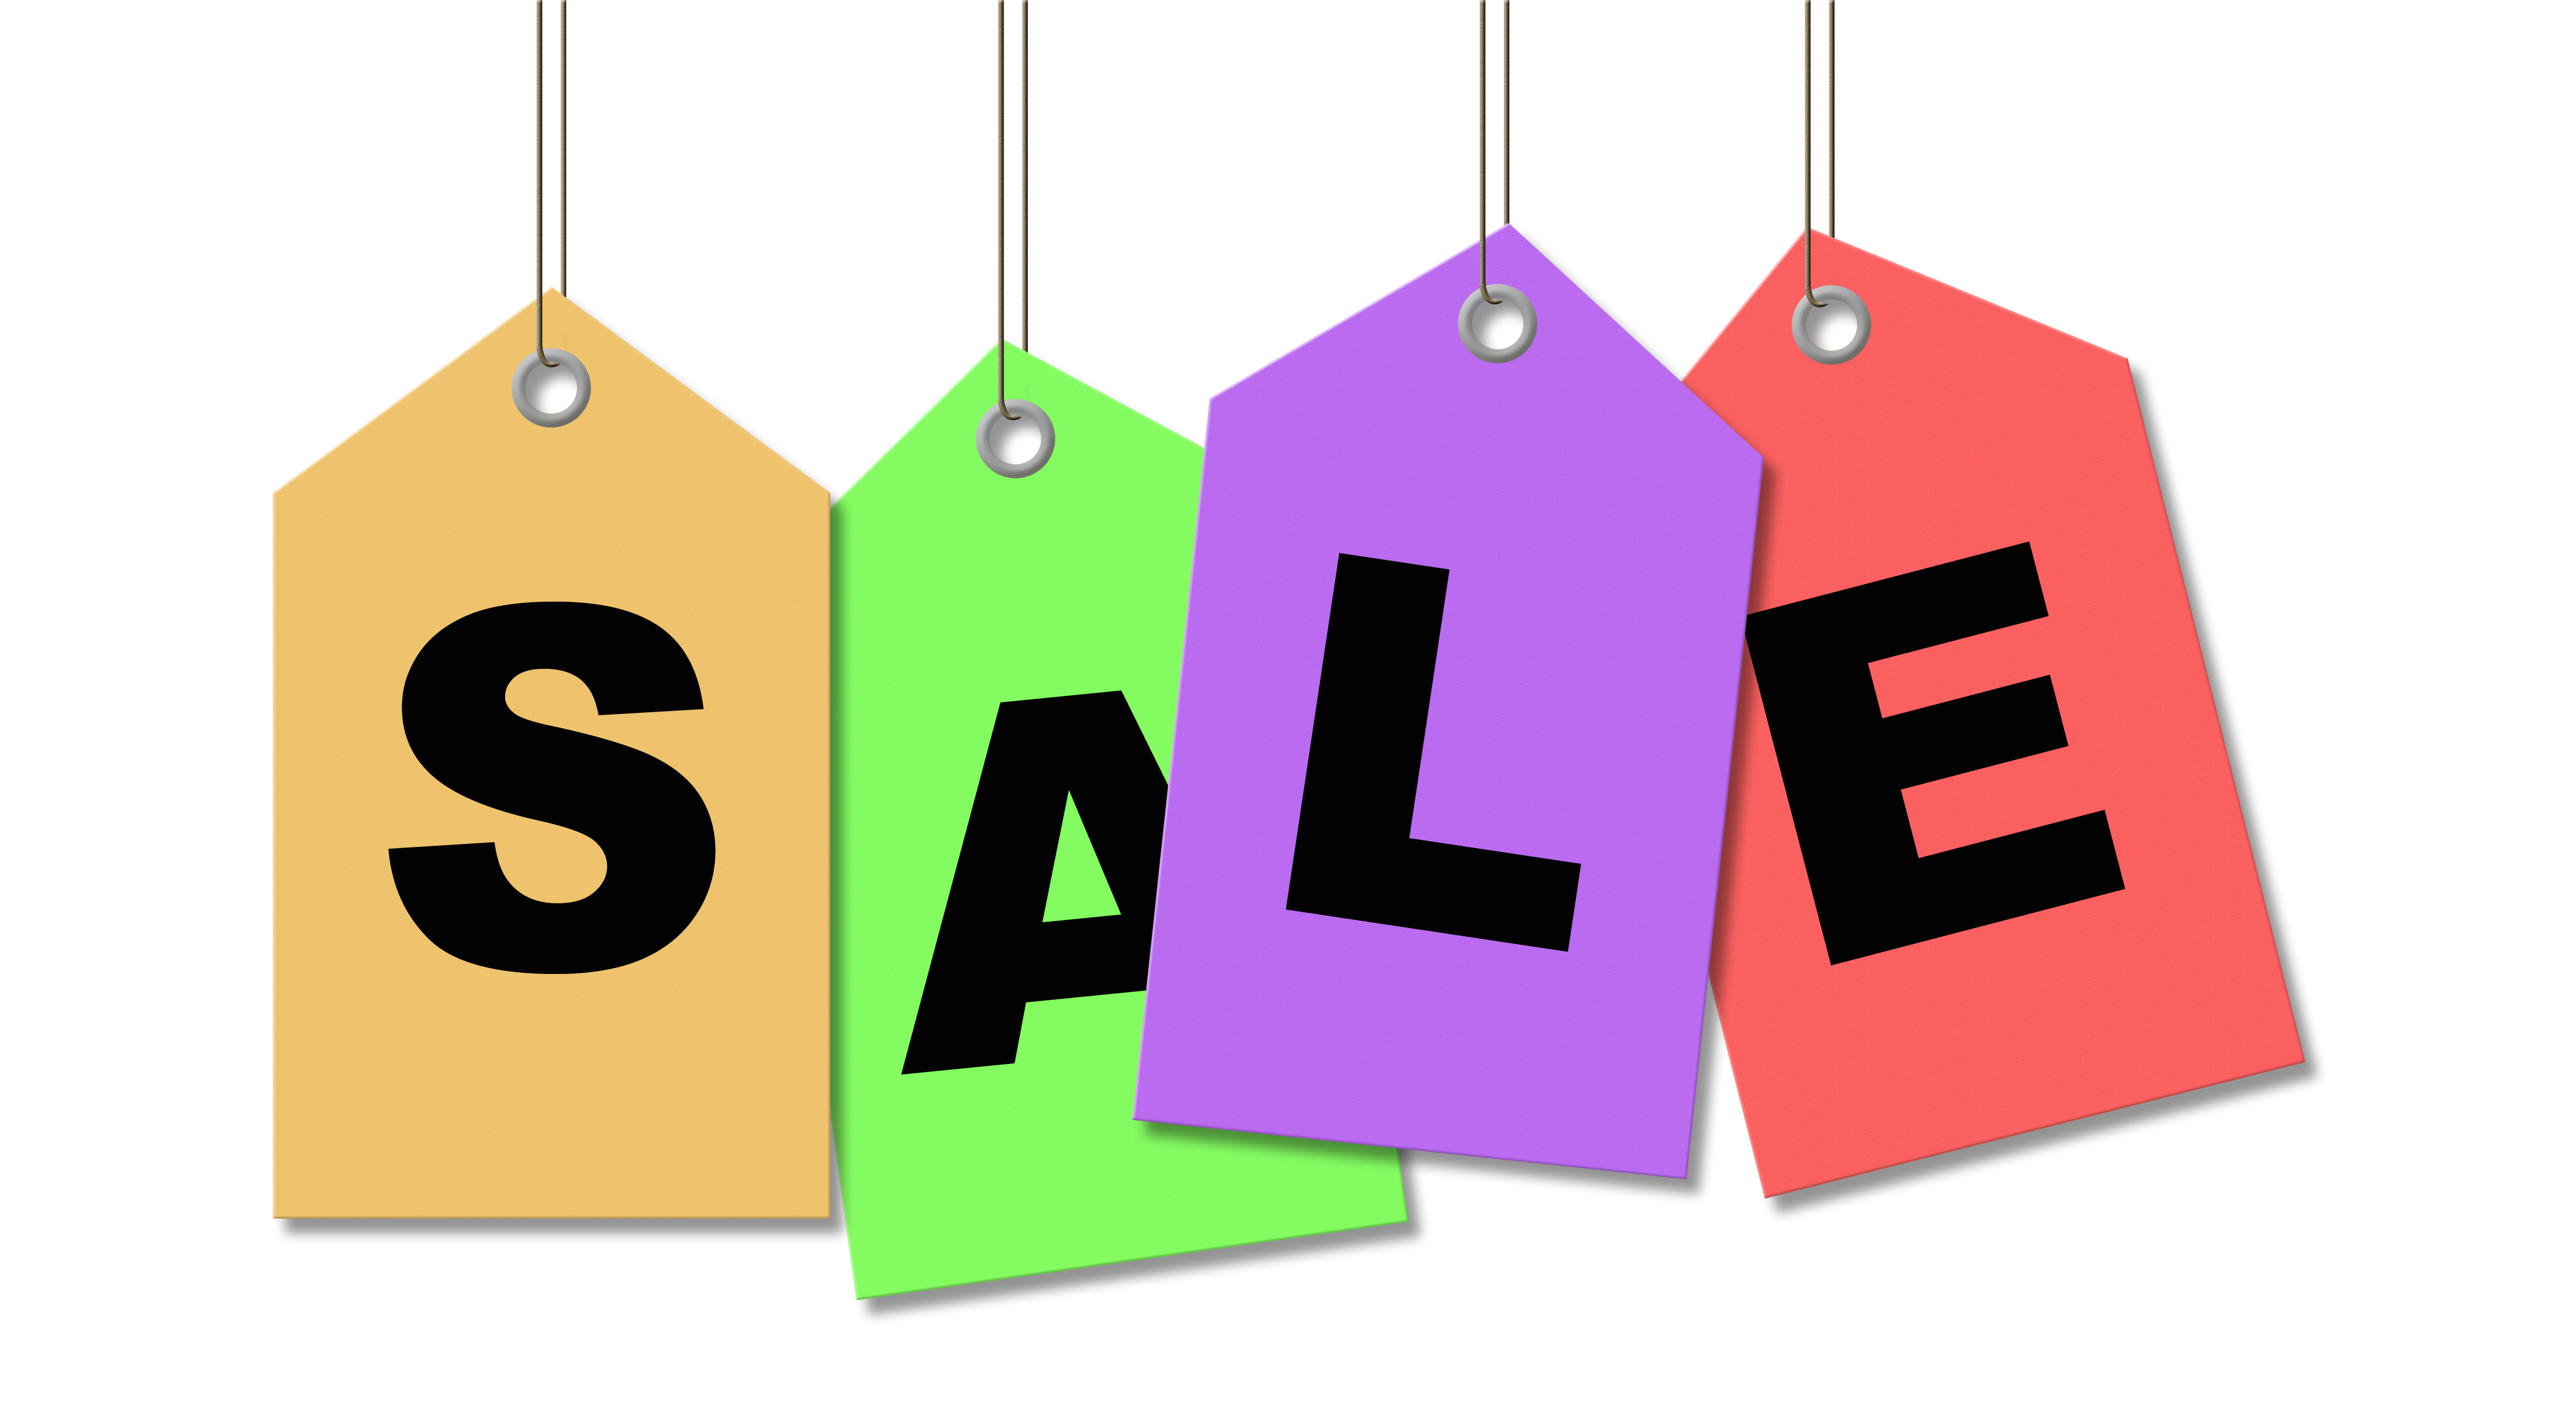

# Churn Model

#### Customer retention

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X = data.iloc[:, 3:-1].values
y = data.iloc[:, -1].values

### Data Preprocessing

#### Label Encoding the Gender column

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

# Label Encoder to convert the gender into binary set

#### One Hot Encoding the Geography column

In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

In [7]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Splitting the dataset into Training set and Test set

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Scaler

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

### Building the ANN

In [10]:
ann = tf.keras.models.Sequential()

#### Inner layer and the first hidden layer

In [11]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#### Second hidden layer

In [12]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

#### Output layer

In [13]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# Sigmoid is for classification & binary, Softmax for more than 2 variables, for regression no need for activation

### Training the ANN

In [14]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# for non binary data =  categorical_crossentropy, for regression = mean_squared_error, binary = binary_crossentropy

### Training the ANN on the Training set

In [15]:
ann.fit(X_train, y_train, batch_size =  32, epochs = 100)

# batch_size default is 32

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5298 - accuracy: 0.7799
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4554 - accuracy: 0.8065
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4316 - accuracy: 0.8181
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4173 - accuracy: 0.8206
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8300
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3940 - accuracy: 0.8365
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3837 - accuracy: 0.8428
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.8469
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3636 - accuracy: 0.8519
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3567 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3321 - accuracy: 0.8636
Epoch 82/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8641
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3319 - accuracy: 0.8643
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8643
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3317 - accuracy: 0.8629
Epoch 86/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8656
Epoch 87/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3320 - accuracy: 0.8646
Epoch 88/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3318 - accuracy: 0.8636
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3322 - accuracy: 0.8625
Epoch 90/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3323 - accuracy: 

### Making the Prediction and evaluating the model

New Data of Customer

* Country: France
* Gender: Male
* Age: 40 years old
* Tenure: 3years
* Balance: 60000EUR
* Num of Products 2
* Does this customer have a credit card Yes
* Active Member Yes
* Estimated Salary 50000EUR

In [16]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

1/1 [==============================] - 0s 89ms/step
[[False]]


In [17]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
final = pd.DataFrame()
final["Acctuate"] = y_test
final["Predicted"] = y_pred
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test), 1)), 1))

63/63 [==============================] - 0s 1ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)*100
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.861
Precision: 0.7212543554006968
Recall: 0.5111111111111111
F1-score: 0.5982658959537571


### Confusion Matrix

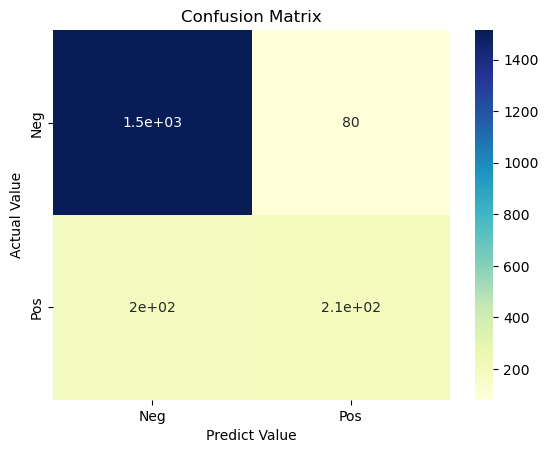

In [19]:
sns.heatmap(cm, annot = True, cmap = "YlGnBu",
           xticklabels=["Neg", "Pos"],
           yticklabels=["Neg", "Pos"])

plt.title("Confusion Matrix")
plt.xlabel("Predict Value")
plt.ylabel("Actual Value")
plt.show()

### Prediction

In [20]:
final.head()

,Acctuate,Predicted
0,0,False
1,1,False
2,0,False
3,0,False
4,0,False
